In [30]:
import os
import csv

# Set the path to the folder containing the images and CSV files
folder_path = '/Users/anedicks/Desktop/THESIS_ADS/neutron_images_res/test'

# Set the path for the output .txt file
output_file = '/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/test.txt'

# Open the output file in write mode
with open(output_file, 'w') as f:
    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            # Create the corresponding CSV file path
            csv_filename = os.path.splitext(filename)[0] + '.csv'
            csv_filepath = os.path.join(folder_path, csv_filename)

            # Check if the corresponding CSV file exists
            if os.path.isfile(csv_filepath):
                # Open the CSV file for reading
                with open(csv_filepath, 'r') as csv_file:
                    # Read the CSV file using a CSV reader
                    csv_reader = csv.DictReader(csv_file, delimiter=',')

                    # Iterate over each row in the CSV file
                    for row in csv_reader:
                        # Extract the required information from the row
                        object_name = row['object_name']
                        normalized_xmin = int(row['object_obxdiv'])
                        normalized_ymin = int(row['object_obydiv'])
                        normalized_xmax = int(row['object_obxdiv']) + int(row['object_width'])
                        normalized_ymax = int(row['object_obydiv']) + int(row['object_height'])

                        object_legality = '0' if row['object_legality'] == 'Objects3D' else '1'

                        # Write the annotation line to the output file
                        annotation_line = f"{filename};{normalized_xmin};{normalized_ymin};{normalized_xmax};{normalized_ymax};{object_legality}\n"
                        f.write(annotation_line)


In [9]:
import pandas as pd

In [ ]:
"""
Script to creat a CSV annotation files for all the images in a given folder
and given text file.
The text file here is TrainIJCNN2013/gt.txt, so the code is according to that.
"""
import pandas as pd
import cv2
def text_to_csv(txt_file_name, csv_file_name):
    # Class names.
    sign_names_df = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/signnames.csv')
    class_names = sign_names_df.SignName.tolist()
    with open(txt_file_name) as f:
        all_lines = f.readlines()
    f.close()
    all_lines = [line.split('\n')[0] for line in all_lines]
    file_name = []
    x_min = []
    y_min = []
    x_max = []
    y_max = []
    class_name = []
    width = []
    height = []
    for line in all_lines:
        all_elements = line.split(';')
        file_name.append(all_elements[0])
        x_min.append(all_elements[1])
        y_min.append(all_elements[2])
        x_max.append(all_elements[3])
        y_max.append(all_elements[4])
        class_name.append(class_names[int(all_elements[5])])
        image = cv2.imread(f"/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/TrainIJCNN2013/{all_elements[0]}")
        img_height, img_width, _ = image.shape
        width.append(img_width)
        height.append(img_height)
    csv_file = pd.DataFrame(columns=[
        'file_name', 'width', 'height', 
        'class_name', 'x_min', 'y_min', 'x_max', 'y_max'
    ])
    csv_file['file_name'] = file_name
    csv_file['x_min'] = x_min
    csv_file['x_max'] = x_max
    csv_file['y_min'] = y_min
    csv_file['y_max'] = y_max
    csv_file['class_name'] = class_name
    csv_file['width'] = width
    csv_file['height'] = height
    print(csv_file.head())
    csv_file.to_csv(f"/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/{csv_file_name}", index=False)
text_to_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/TrainIJCNN2013/gt.txt', 'all_annots.csv')

In [23]:
"""
Script to create a training and validation CSV file.
"""
import pandas as pd
import shutil
import os
def train_valid_split(all_images_folder=None, all_annots_csv=None, split=0.15):
    all_df = pd.read_csv(all_annots_csv)
    # Shuffle the CSV file rows.
    all_df.sample(frac=1)
    len_df = len(all_df)
    train_split = int((1-split)*len_df)
    train_df = all_df[:train_split]
    valid_df = all_df[train_split:]
    os.makedirs('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/train_images', exist_ok=True)
    os.makedirs('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/valid_images', exist_ok=True)
    # Copy training images.
    train_images = train_df['file_name'].tolist()
    for image in train_images:
        shutil.copy(
            f"/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/TrainIJCNN2013/{image}", 
            f"/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/train_images/{image}"
        )
    train_df.to_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/train.csv', index=False)
    # Copy validation images.
    valid_images = valid_df['file_name'].tolist()
    for image in valid_images:
        shutil.copy(
            f"/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/TrainIJCNN2013/{image}", 
            f"/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/valid_images/{image}"
        )
    valid_df.to_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/valid.csv', index=False)
train_valid_split(all_annots_csv='/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/all_annots.csv')

In [ ]:
from collections import defaultdict
import os
import csv

from xml.etree.ElementTree import parse, Element, SubElement, ElementTree
import xml.etree.ElementTree as ET


def write_xml(folder, filename, bbox_list):
    root = Element('annotation')
    SubElement(root, 'folder').text = folder
    SubElement(root, 'filename').text = filename
    SubElement(root, 'path').text = './images' +  filename
    source = SubElement(root, 'source')
    SubElement(source, 'database').text = 'Unknown'


    # Details from first entry
    e_filename, e_width, e_height, e_class_name, e_xmin, e_ymin, e_xmax, e_ymax = bbox_list[0]
    
    size = SubElement(root, 'size')
    SubElement(size, 'width').text = e_width
    SubElement(size, 'height').text = e_height
    SubElement(size, 'depth').text = '3'

    SubElement(root, 'segmented').text = '0'

    for entry in bbox_list:
        e_filename, e_width, e_height, e_class_name, e_xmin, e_ymin, e_xmax, e_ymax = entry
        
        obj = SubElement(root, 'object')
        SubElement(obj, 'name').text = e_class_name
        SubElement(obj, 'pose').text = 'Unspecified'
        SubElement(obj, 'truncated').text = '0'
        SubElement(obj, 'difficult').text = '0'

        bbox = SubElement(obj, 'bndbox')
        SubElement(bbox, 'xmin').text = e_xmin
        SubElement(bbox, 'ymin').text = e_ymin
        SubElement(bbox, 'xmax').text = e_xmax
        SubElement(bbox, 'ymax').text = e_ymax

    #indent(root)
    tree = ElementTree(root)
    
    xml_filename = os.path.join('.', folder, os.path.splitext(filename)[0] + '.xml')
    tree.write(xml_filename)
    

save_paths = ['/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/train_xmls', '/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/valid_xmls']
csv_files = ['/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/train.csv', '/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/valid.csv']

for i, csv_file in enumerate(csv_files):
    entries_by_filename = defaultdict(list)

    save_root2 = save_paths[i]

    if not os.path.exists(save_root2):
        os.mkdir(save_root2)

    with open(csv_file, 'r', encoding='utf-8') as f_input_csv:
        csv_input = csv.reader(f_input_csv)
        header = next(csv_input)

        for row in csv_input:
            """
            The CSV file column should be in the following order.
            Column names can be anythong.
            """
            filename, width, height, class_name, xmin, ymin, xmax, ymax = row
            entries_by_filename[filename].append(row) #for whole csv to xml
            #if you want some desire classes then comment above line and uncomment if and else comment
            #if class_name == "yes":  #for more class - if class_name in ["traffic_sign", "car", "bike"]
            #    entries_by_filename[filename].append(row)
            #else:
            #    entries_by_filename[filename].append(row)


    for filename, entries in entries_by_filename.items():
        print(filename, len(entries))
        write_xml(save_root2, filename, entries)


In [ ]:
from torch_utils.engine import (
    train_one_epoch, evaluate
)
from config import (
    DEVICE, NUM_CLASSES,
    NUM_EPOCHS, NUM_WORKERS,
    OUT_DIR, VISUALIZE_TRANSFORMED_IMAGES
)
from datasets import (
    create_train_dataset, create_valid_dataset, 
    create_train_loader, create_valid_loader
)
from models.fasterrcnn_mobilenetv3_large_fpn import create_model
from custom_utils import (
    save_model, 
    save_train_loss_plot,
    Averager, show_tranformed_image
)

import torch

if __name__ == '__main__':
    train_dataset = create_train_dataset()
    valid_dataset = create_valid_dataset()
    train_loader = create_train_loader(train_dataset, NUM_WORKERS)
    valid_loader = create_valid_loader(valid_dataset, NUM_WORKERS)
    print(f"Number of training samples: {len(train_dataset)}")
    print(f"Number of validation samples: {len(valid_dataset)}\n")

    if VISUALIZE_TRANSFORMED_IMAGES:
        show_tranformed_image(train_loader)

    # Initialize the Averager class.
    train_loss_hist = Averager()
    # Train and validation loss lists to store loss values of all
    # iterations till ena and plot graphs for all iterations.
    train_loss_list = []

    # Initialize the model and move to the computation device.
    model = create_model(num_classes=NUM_CLASSES)
    model = model.to(DEVICE)
    # Total parameters and trainable parameters.
    total_params = sum(p.numel() for p in model.parameters())
    print(f"{total_params:,} total parameters.")
    total_trainable_params = sum(
        p.numel() for p in model.parameters() if p.requires_grad)
    print(f"{total_trainable_params:,} training parameters.\n")
    # Get the model parameters.
    params = [p for p in model.parameters() if p.requires_grad]
    # Define the optimizer.
    # optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, weight_decay=0.0005)
    optimizer = torch.optim.AdamW(params, lr=0.0001, weight_decay=0.0005)

    # LR will be zero as we approach `steps` number of epochs each time.
    # If `steps = 5`, LR will slowly reduce to zero every 5 epochs.
    steps = NUM_EPOCHS + 25
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, 
        T_0=steps,
        T_mult=1,
        verbose=True
    )

    for epoch in range(NUM_EPOCHS):
        train_loss_hist.reset()

        _, batch_loss_list = train_one_epoch(
            model, 
            optimizer, 
            train_loader, 
            DEVICE, 
            epoch, 
            train_loss_hist,
            print_freq=100,
            scheduler=scheduler
        )

        evaluate(model, valid_loader, device=DEVICE)

        # Add the current epoch's batch-wise lossed to the `train_loss_list`.
        train_loss_list.extend(batch_loss_list)

        # Save the current epoch model.
        save_model(OUT_DIR, epoch, model, optimizer)

        # Save loss plot.
        save_train_loss_plot(OUT_DIR, train_loss_list)

Results

In [7]:
import torch
dict = torch.load('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/last_model.pth')



dict_keys(['state', 'param_groups'])

In [4]:
import csv

small_count = 0
medium_count = 0
large_count = 0

resized_width = 512
resized_height = 512

with open('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/input/train.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        class_name = row['class_name']
        width = int(row['width'])
        height = int(row['height'])
        x_min = float(row['x_min'])
        y_min = float(row['y_min'])
        x_max = float(row['x_max'])
        y_max = float(row['y_max'])
        
        # Calculate the scaling factors for width and height
        width_scale = resized_width / width
        height_scale = resized_height / height
        
        # Scale the bounding box coordinates
        x_min *= width_scale
        y_min *= height_scale
        x_max *= width_scale
        y_max *= height_scale
        
        # Calculate the area and aspect ratio based on the resized dimensions
        area = (x_max - x_min) * (y_max - y_min)
        aspect_ratio = (x_max - x_min) / (y_max - y_min)
        
        if area < 322:
            small_count += 1
        elif 322 <= area <= 962 and aspect_ratio <= 1.0:
            medium_count += 1
        else:
            large_count += 1

print("Small objects count:", small_count)
print("Medium objects count:", medium_count)
print("Large objects count:", large_count)


Small objects count: 185
Medium objects count: 28
Large objects count: 5929


Model 1 - MobileNetv3

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
total_loss = [ 0.4862, 0.4633, 0.4343, 0.4108, 0.4037, 0.4131, 0.3901, 0.3778, 0.3591,
              0.3547, 0.3303, 0.3493, 0.3308, 0.3441, 0.3291, 0.3193, 0.3006, 0.2967, 0.3019]

# Plotting the data
plt.plot(epochs, total_loss, marker='o')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Model 1')

# Set the x-axis ticks at integer values
plt.xticks(epochs)

# Displaying the graph
plt.show()


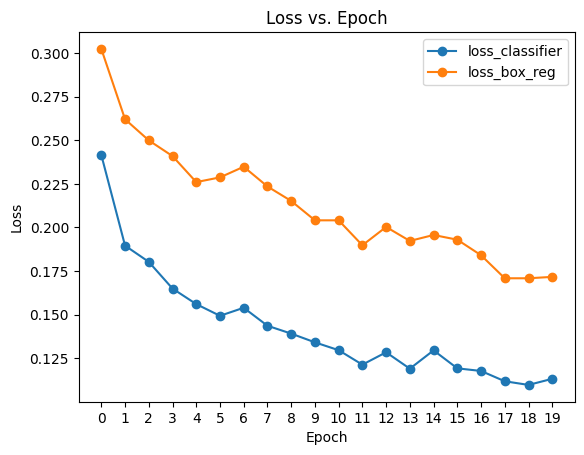

In [15]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(20))
loss_classifier = [0.2415, 0.1896, 0.1803, 0.1650, 0.1561, 0.1494, 0.1540, 0.1437, 0.1392, 0.1342,
                   0.1297, 0.1214, 0.1285, 0.1191, 0.1296, 0.1193, 0.1178, 0.1119, 0.1098, 0.1133]
loss_box_reg = [0.3023, 0.2620, 0.2499, 0.2409, 0.2260, 0.2287, 0.2348, 0.2235, 0.2152, 0.2041,
                0.2041, 0.1898, 0.2003, 0.1923, 0.1957, 0.1930, 0.1841, 0.1709, 0.1709, 0.1717]

# Plotting the data
plt.plot(epochs, loss_classifier, marker='o', label='loss_classifier')
plt.plot(epochs, loss_box_reg, marker='o', label='loss_box_reg')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')

# Set the x-axis ticks at integer values
plt.xticks(epochs)

# Adding legend
plt.legend()

# Displaying the graph
plt.show()


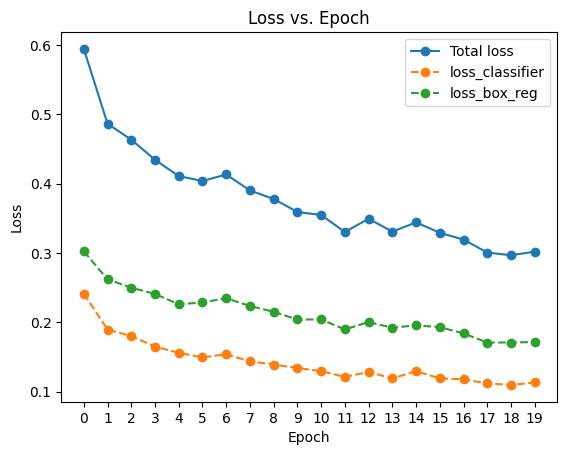

In [17]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(20))
total_loss = [0.5941, 0.4862, 0.4633, 0.4343, 0.4108, 0.4037, 0.4131, 0.3901, 0.3778, 0.3591,
              0.3547, 0.3303, 0.3493, 0.3308, 0.3441, 0.3291, 0.3193, 0.3006, 0.2967, 0.3019]
loss_classifier = [0.2415, 0.1896, 0.1803, 0.165, 0.1561, 0.1494, 0.154, 0.1437, 0.1392, 0.1342,
                   0.1297, 0.1214, 0.1285, 0.1191, 0.1296, 0.1193, 0.1178, 0.1119, 0.1098, 0.1133]
loss_box_reg = [0.3023, 0.262, 0.2499, 0.2409, 0.226, 0.2287, 0.2348, 0.2235, 0.2152, 0.2041,
                0.2041, 0.1898, 0.2003, 0.1923, 0.1957, 0.193, 0.1841, 0.1709, 0.1709, 0.1717]

# Plotting the data
plt.plot(epochs, total_loss, marker='o', label='Total loss')
plt.plot(epochs, loss_classifier, '--', marker='o', label='loss_classifier')
plt.plot(epochs, loss_box_reg, '--', marker='o', label='loss_box_reg')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')

# Set the x-axis ticks at integer values
plt.xticks(epochs)

# Adding legend
plt.legend()

# Displaying the graph
plt.show()


Model 2 - ResNet50

Epoch 0-49

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
          31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
total_loss = [0.4258, 0.2903, 0.2608, 0.2290, 0.2141, 0.1963, 0.1865, 0.1885, 0.1813, 0.1639,
              0.1741, 0.1621, 0.1558, 0.1529, 0.1506, 0.1476, 0.1439, 0.1428, 0.1432, 0.1340,
              0.1368, 0.1298, 0.1283, 0.1245, 0.1223, 0.1144, 0.1192, 0.1078, 0.1106, 0.1036,
               0.1043, 0.1093, 0.0995, 0.0996, 0.0996, 0.0999, 0.0965, 0.0907, 0.0955, 0.0964,
              0.0866, 0.0835, 0.0816, 0.0785, 0.0849, 0.0737, 0.0775, 0.0783, 0.0761, 0.0783]

# Plotting the data
plt.plot(epochs, total_loss, marker='o')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Total Loss vs. Epoch')

# Displaying the graph
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Model 1

# Data
epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
          31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

total_loss = [0.5941, 0.4862, 0.4633, 0.4343, 0.4108, 0.4037, 0.4131, 0.3901, 0.3778, 0.3591, 0.3547, 0.3303, 0.3493, 0.3308, 0.3441, 0.3291, 0.3193, 0.3006, 0.2967, 0.3019, 0.3022, 0.306, 0.304, 0.305, 0.298, 0.299, 0.302, 0.3, 0.298, 0.297, 0.285, 0.292, 0.3, 0.301, 0.302, 0.299, 0.298, 0.296, 0.294, 0.295, 0.293, 0.295, 0.292, 0.292, 0.291, 0.294, 0.2921, 0.2975, 0.2994, 0.2989]


# Plotting the data
plt.plot(epochs, total_loss, marker='o')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Model 1')

# Displaying the graph
plt.show()


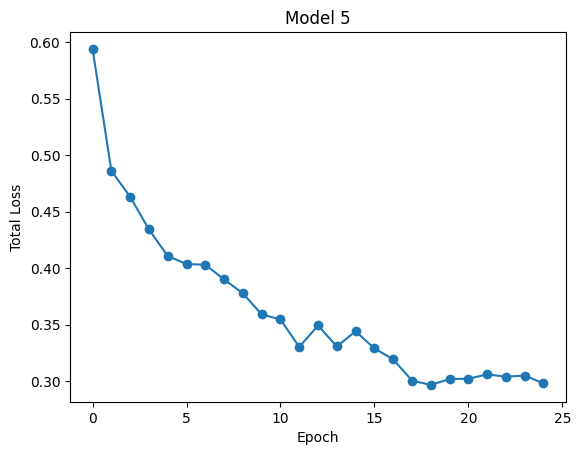

In [14]:
# Model 5

# Data
epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

total_loss = [0.5941, 0.4862, 0.4633, 0.4343, 0.4108, 0.4037, 0.4031, 0.3901, 0.3778, 0.3591, 0.3547, 0.3303, 0.3493, 0.3308, 0.3441, 0.3291, 0.3193, 0.3006, 0.2967, 0.3019, 0.3022, 0.306, 0.304, 0.305, 0.298]

# Plotting the data
plt.plot(epochs, total_loss, marker='o')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Model 5')

# Displaying the graph
plt.show()

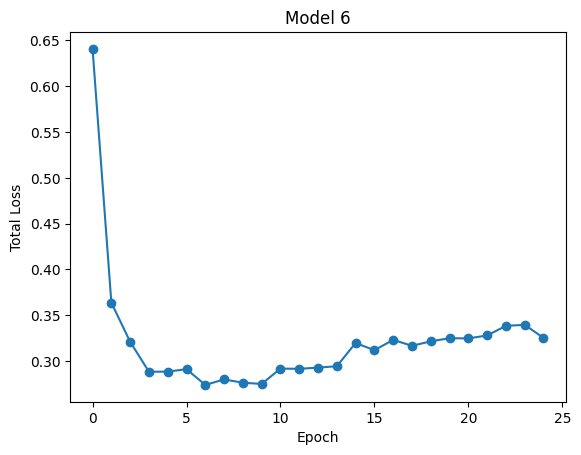

In [16]:
# Model 6

# Data
epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

total_loss = [0.6408, 0.3637, 0.3210, 0.2883, 0.2884, 0.2911, 0.2739, 0.2799, 0.2763, 0.2750, 0.2917, 0.2915, 0.2928, 0.2943, 0.3197, 0.3118, 0.3231, 0.3166, 0.3215, 0.3249, 0.3247, 0.3279, 0.3384, 0.3395, 0.3253]

# Plotting the data
plt.plot(epochs, total_loss, marker='o')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Model 6')

# Displaying the graph
plt.show()

Model 4 - ResNet50

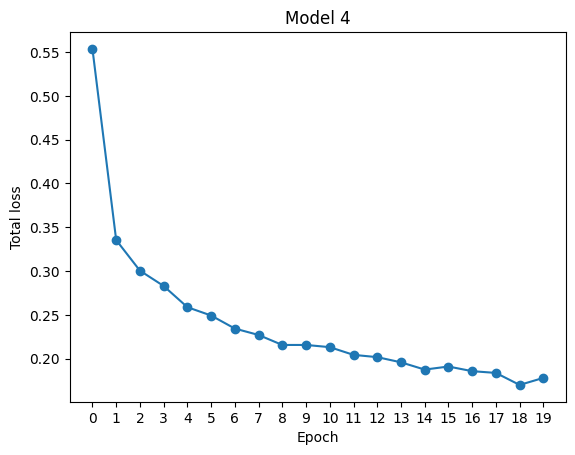

In [14]:
import matplotlib.pyplot as plt

epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
loss = [0.5535, 0.3354, 0.3005, 0.283, 0.2588, 0.2493, 0.2344, 0.2271, 0.2157, 0.2157, 0.2132, 0.2044, 0.2018, 0.1959, 0.1876, 0.1911, 0.1858, 0.1838, 0.1701, 0.1781]

plt.plot(epochs, loss, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Total loss')
# Set the x-axis ticks at integer values
plt.xticks(epochs)
plt.title('Model 4')
plt.show()


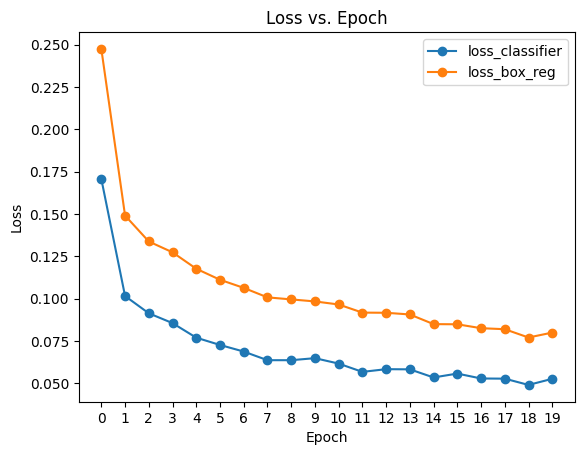

In [16]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(20))
loss_classifier = [0.1706, 0.1015, 0.0913, 0.0855, 0.0769, 0.0726, 0.0687, 0.0636, 0.0636, 0.0648,
                   0.0616, 0.0567, 0.0583, 0.0582, 0.0534, 0.0557, 0.0528, 0.0527, 0.049, 0.0526]
loss_box_reg = [0.2474, 0.149, 0.1337, 0.1273, 0.1176, 0.1111, 0.1063, 0.1007, 0.0995, 0.0983,
                0.0965, 0.0917, 0.0916, 0.0906, 0.0849, 0.0848, 0.0825, 0.0819, 0.077, 0.0799]

# Plotting the data
plt.plot(epochs, loss_classifier, marker='o', label='loss_classifier')
plt.plot(epochs, loss_box_reg, marker='o', label='loss_box_reg')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')

# Set the x-axis ticks at integer values
plt.xticks(epochs)

# Adding legend
plt.legend()

# Displaying the graph
plt.show()


Retrieve results

mAP and M

In [70]:
import re
import csv

# Read the input string
input_string = """
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.668
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.891
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.747
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.250
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.664
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.384
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.735
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.739
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.381
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.741
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.784

"""

# Define the regex patterns to extract the values
patterns = {
    "mAR_s": r"Average Recall\s+\(AR\)\s+\@\[\s*IoU=0\.50:0\.95\s+\|\s+area=\s+small\s+\|\s+maxDets=100\s+\]\s+=\s+(\d+\.\d+)",
    "mAR_m": r"Average Recall\s+\(AR\)\s+\@\[\s*IoU=0\.50:0\.95\s+\|\s+area=+medium\s+\|\s+maxDets=100\s+\]\s+=\s+(\d+\.\d+)",
    "mAR_l": r"Average Recall\s+\(AR\)\s+\@\[\s*IoU=0\.50:0\.95\s+\|\s+area=\s+large\s+\|\s+maxDets=100\s+\]\s+=\s+(\d+\.\d+)",
    "mAR_all": r"Average Recall\s+\(AR\)\s+\@\[\s*IoU=0\.50:0\.95\s+\|\s+area=\s+all\s+\|\s+maxDets=100\s+\]\s+=\s+(\d+\.\d+)",
    "mAP_s": r"Average Precision\s+\(AP\)\s+\@\[\s*IoU=0\.50:0\.95\s+\|\s+area=\s+small\s+\|\s+maxDets=100\s+\]\s+=\s+(\d+\.\d+)",
    "mAP_m": r"Average Precision\s+\(AP\)\s+\@\[\s*IoU=0\.50:0\.95\s+\|\s+area=+medium\s+\|\s+maxDets=100\s+\]\s+=\s+(\d+\.\d+)",
    "mAP_l": r"Average Precision\s+\(AP\)\s+\@\[\s*IoU=0\.50:0\.95\s+\|\s+area=\s+large\s+\|\s+maxDets=100\s+\]\s+=\s+(\d+\.\d+)",
    "mAP_all": r"Average Precision\s+\(AP\)\s+\@\[\s*IoU=0\.50:0\.95\s+\|\s+area=\s+all\s+\|\s+maxDets=100\s+\]\s+=\s+(\d+\.\d+)"
}



# Create a dictionary to store the extracted values
values = {}

# Extract the values using regex patterns
for key, pattern in patterns.items():
    match = re.search(pattern, input_string)
    if match:
        values[key] = match.group(1)

# Write the values to a CSV file
with open('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/5/epoch_test_5.1.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=';')
    writer.writerow(values.values())


print("Values have been written to epoch_test.csv")




Values have been written to epoch_test.csv


In [71]:
import pandas as pd

df = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/5/epoch_test_5.1.csv', delimiter = ";")

df

# Perform the operation on the desired columns and assign the result to a new column
df['F1_score_all'] = round((2 * df['mAR_all'] * df['mAP_all'])/(df['mAR_all'] + df['mAP_all']),3) 
df['F1_score_s'] = round((2 * df['mAR_s'] * df['mAP_s'])/(df['mAR_s'] + df['mAP_s']),3) 
df['F1_score_m'] = round((2 * df['mAR_m'] * df['mAP_m'])/(df['mAR_m'] + df['mAP_m']),3) 
df['F1_score_l'] = round((2 * df['mAR_l'] * df['mAP_l'])/(df['mAR_l'] + df['mAP_l']),3) 

# Assuming you have a DataFrame called 'df'
df.to_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/5/output_5.1.csv', index=False)


In [ ]:
df

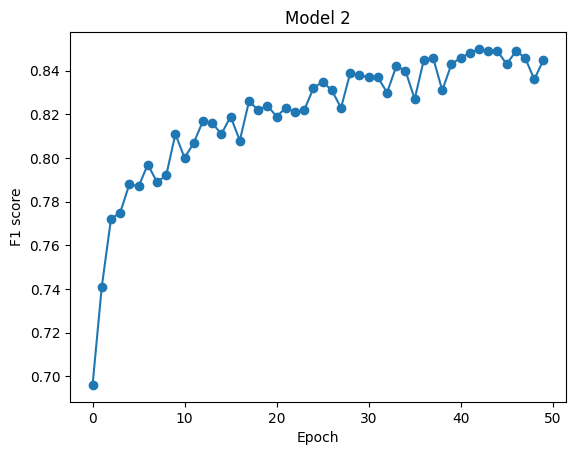

In [47]:
df = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/2/output.csv', delimiter = ",")

import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataframe called 'df' with columns 'column1' and 'column2'
# You can replace 'column1' and 'column2' with the actual column names from your dataframe


# Plotting a scatter plot
plt.plot(df['Epoch'], df['F1_score_all'], marker='o')
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.title('Model 2')
plt.show()


In [ ]:
plt.plot(df['Epoch'], df['F1_score_s'], marker='o')
plt.plot(df['Epoch'], df['F1_score_m'], marker='o')
plt.plot(df['Epoch'], df['F1_score_l'], marker='o')
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.title('Model 2')
plt.show()

Model comparison

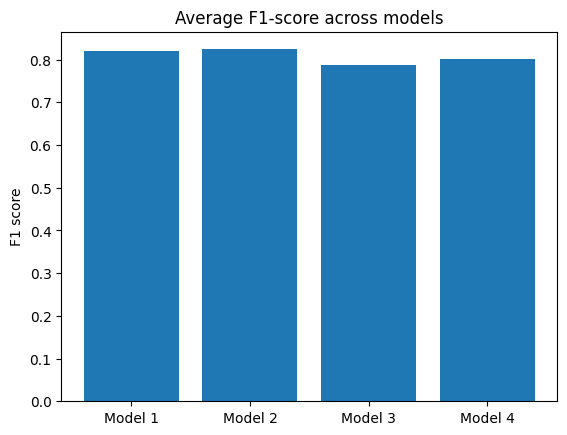

In [23]:
import matplotlib.pyplot as plt

# Define the F1_score_all values for each model
f1_scores_all = [0.821, 0.824, 0.787, 0.802]

# Define the models
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Set the x-axis labels
x = range(len(models))

# Create a bar plot
plt.bar(x, f1_scores_all)

# Set the x-axis tick labels
plt.xticks(x, models)

# Set the y-axis label
plt.ylabel('F1 score')

# Set the plot title
plt.title('Average F1-score across models')

# Display the plot
plt.show()


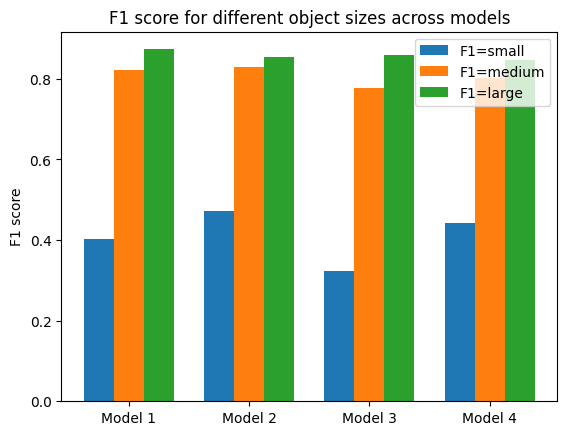

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define the F1_score values for each model and category
f1_scores_s = [0.402, 0.473, 0.324, 0.442]
f1_scores_m = [0.822, 0.83, 0.776, 0.801]
f1_scores_l = [0.873, 0.855, 0.86, 0.847]

# Define the models
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Set the width of the bars
bar_width = 0.25

# Set the x-axis positions for the bars
x_s = np.arange(len(models))
x_m = [x + bar_width for x in x_s]
x_l = [x + 2 * bar_width for x in x_s]

# Create a bar plot for F1_score_s
plt.bar(x_s, f1_scores_s, width=bar_width, label='F1=small')

# Create a bar plot for F1_score_m
plt.bar(x_m, f1_scores_m, width=bar_width, label='F1=medium')

# Create a bar plot for F1_score_l
plt.bar(x_l, f1_scores_l, width=bar_width, label='F1=large')

# Set the x-axis tick labels
plt.xticks(x_m, models)

# Set the y-axis label
plt.ylabel('F1 score')

# Set the plot title
plt.title('F1 score for different object sizes across models')

# Add a legend
plt.legend()

# Display the plot
plt.show()


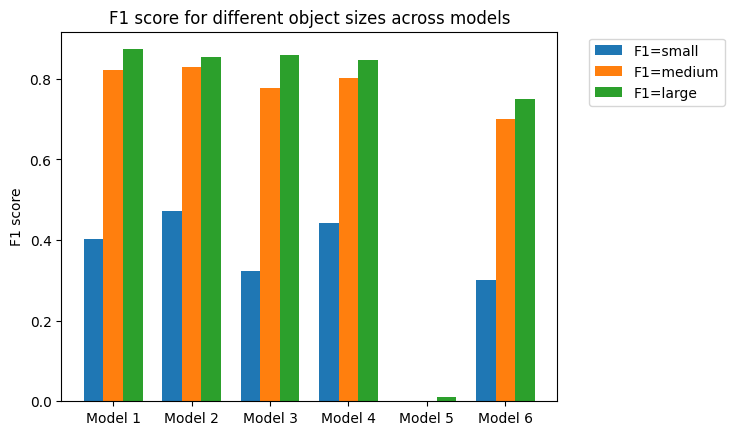

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define the F1_score values for each model and category
f1_scores_s = [0.402, 0.473, 0.324, 0.442, 0, 0.3]
f1_scores_m = [0.822, 0.83, 0.776, 0.801, 0, 0.7]
f1_scores_l = [0.873, 0.855, 0.86, 0.847, 0.01, 0.75]

# Define the models
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']

# Set the width of the bars
bar_width = 0.25

# Set the x-axis positions for the bars
x_s = np.arange(len(models))
x_m = [x + bar_width for x in x_s]
x_l = [x + 2 * bar_width for x in x_s]

# Create a bar plot for F1_score_s
plt.bar(x_s, f1_scores_s, width=bar_width, label='F1=small')

# Create a bar plot for F1_score_m
plt.bar(x_m, f1_scores_m, width=bar_width, label='F1=medium')

# Create a bar plot for F1_score_l
plt.bar(x_l, f1_scores_l, width=bar_width, label='F1=large')

# Set the x-axis tick labels
plt.xticks(x_m, models)

# Set the y-axis label
plt.ylabel('F1 score')

# Set the plot title
plt.title('F1 score for different object sizes across models')

# Adjust the position of the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


Optimizer: Compare 1 and 2

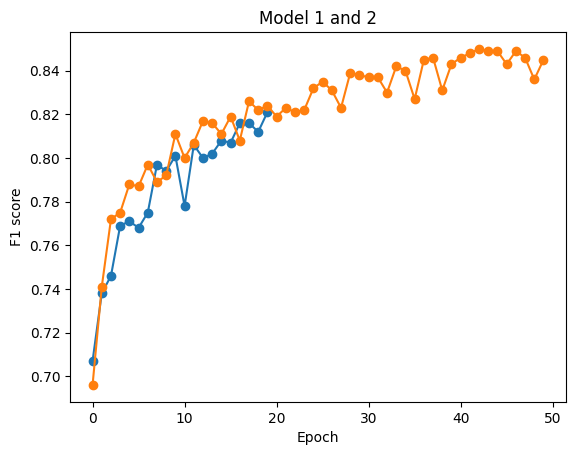

In [120]:
df_1 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/1/output.csv')

df_2 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/2/output.csv')

# Plotting a scatter plot
plt.plot(df_1['Epoch'], df_1['F1_score_all'], marker='o')
plt.plot(df_2['Epoch'], df_2['F1_score_all'], marker='o')
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.title('Model 1 and 2')
plt.show()

Optimizer: Compare 3 and 4

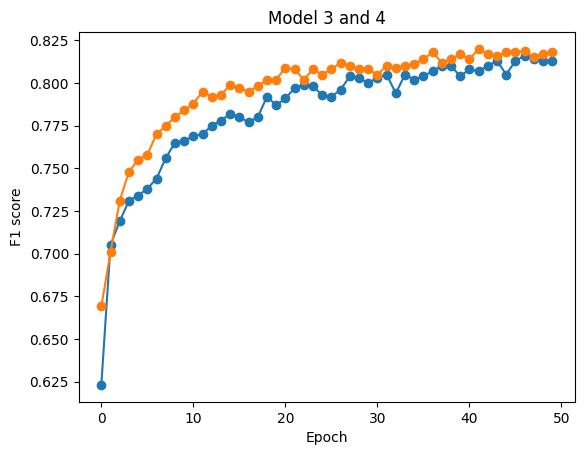

In [119]:
df_3 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/3/output.csv')

df_4 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/4/output.csv')

# Plotting a scatter plot
plt.plot(df_3['Epoch'], df_3['F1_score_all'], marker='o')
plt.plot(df_4['Epoch'], df_4['F1_score_all'], marker='o')
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.title('Model 3 and 4')
plt.show()

Backbone: Compare 2 and 4

In [4]:
import pandas as pd
df_2 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/2/output.csv')

df_4 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/4/output.csv')

# Plotting a scatter plot
plt.plot(df_2['Epoch'], df_2['F1_score_all'], marker='o', label='Model 2')
plt.plot(df_4['Epoch'], df_4['F1_score_all'], marker='o', label='Model 4')
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.legend()
plt.title('Model 2 and 4')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/4/output.csv'

Overall F1 score

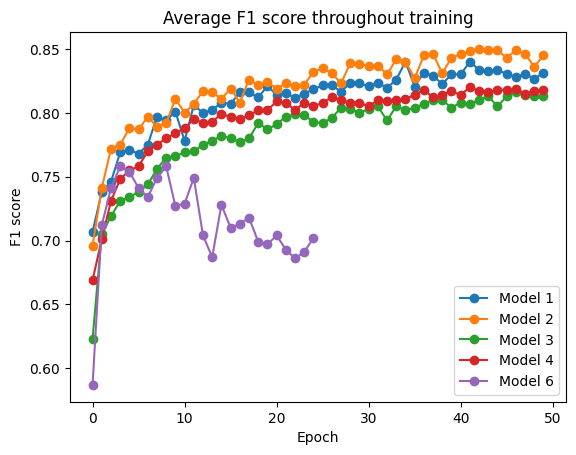

In [77]:
df_1 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/1/output.csv')
df_2 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/2/output.csv')
df_3 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/3/output_complete.csv')
df_4 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/4/output_complete.csv')

# Plotting a scatter plot
values = [0.707, 0.738, 0.746, 0.769, 0.771, 0.768, 0.775, 0.797, 0.794, 0.801, 0.778, 0.806, 0.800, 0.802, 0.808, 0.807, 0.816, 0.816, 0.812, 0.821, 0.814, 0.8155, 0.8115, 0.815, 0.8185, 0.8215, 0.8215, 0.8165, 0.8235, 0.823, 0.821, 0.8235, 0.8195, 0.826, 0.8400, 0.8205, 0.8315, 0.829, 0.8225, 0.83, 0.83, 0.840, 0.8335, 0.8325, 0.8335, 0.8305, 0.828, 0.8305, 0.8265, 0.8315]

# Mod 5
epochs_25 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
values_2 = [0.47, 0.238, 0.195, 0.146, 0.178, 0.053, 0.164, 0.164, 0.0, 0.0, 0.002, 0.002]


# Mod 6
values_3 = [0.587, 0.712, 0.741, 0.758, 0.754, 0.741, 0.734, 0.749, 0.758, 0.727, 0.729, 0.749, 0.704, 0.687, 0.728, 0.71, 0.713, 0.718, 0.699, 0.697, 0.704, 0.693, 0.686, 0.691, 0.702]


plt.plot(df_2['Epoch'], values, marker='o', label='Model 1')
plt.plot(df_2['Epoch'], df_2['F1_score_all'], marker='o', label='Model 2')
plt.plot(df_3['Epoch'], df_3['F1_score_all'], marker='o', label='Model 3')
plt.plot(df_4['Epoch'], df_4['F1_score_all'], marker='o', label='Model 4')
#plt.plot(epochs_25, values_2, marker='o', label='Model 5')
plt.plot(epochs_25, values_3, marker='o', label='Model 6')

plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.legend()
plt.title('Average F1 score throughout training')
plt.show()

F1 score for different object sizes

Model 1

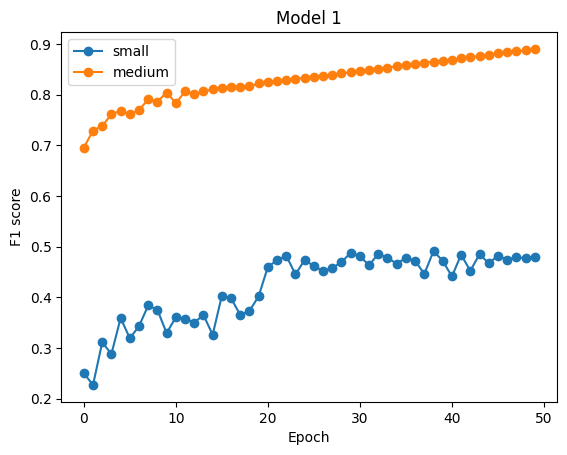

In [26]:
df_1 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/1/output.csv')

epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
          31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

F1_s = [0.25, 0.227, 0.311, 0.288, 0.359, 0.319, 0.343, 0.384, 0.375, 0.329, 0.361, 0.358, 0.35, 0.365, 0.326, 0.403, 0.398, 0.365, 0.373, 0.402, 0.46, 0.473, 0.482, 0.445, 0.474, 0.461, 0.452, 0.458, 0.469, 0.488, 0.481, 0.463, 0.486, 0.478, 0.466, 0.478, 0.472, 0.446, 0.491, 0.472, 0.441, 0.484, 0.452, 0.485, 0.467, 0.482, 0.474, 0.479, 0.477, 0.48]
F1_m = [0.695, 0.729, 0.738, 0.761, 0.768, 0.761, 0.769, 0.791, 0.786, 0.804, 0.783, 0.806, 0.801, 0.806, 0.81, 0.812, 0.815, 0.815, 0.816, 0.822, 0.824, 0.826, 0.828, 0.831, 0.833, 0.835, 0.837, 0.839, 0.842, 0.844, 0.847, 0.849, 0.851, 0.853, 0.856, 0.858, 0.86, 0.863, 0.865, 0.867, 0.869, 0.872, 0.874, 0.876, 0.878, 0.881, 0.883, 0.885, 0.887, 0.89]


# Plotting a scatter plot
plt.plot(epochs, F1_s, marker='o', label='small')
plt.plot(epochs, F1_m, marker='o', label='medium')
#plt.plot(df_1['Epoch'], df_1['F1_score_l'], marker='o', label='large')
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.legend()
plt.title('Model 1')
plt.show()

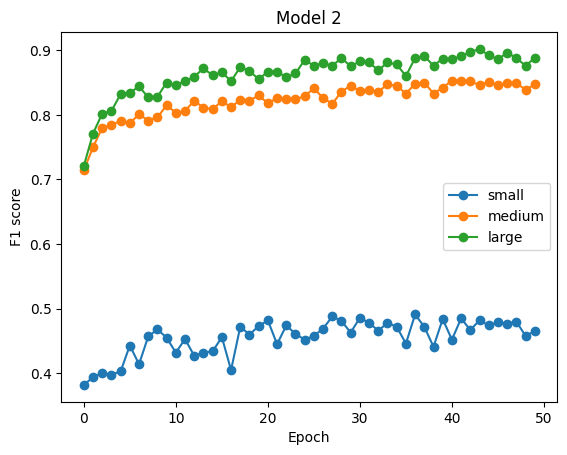

In [6]:
df_2 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/2/output.csv')


# Plotting a scatter plot
plt.plot(df_2['Epoch'], df_2['F1_score_s'], marker='o', label='small')
plt.plot(df_2['Epoch'], df_2['F1_score_m'], marker='o', label='medium')
plt.plot(df_2['Epoch'], df_2['F1_score_l'], marker='o', label='large')
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.legend()
plt.title('Model 2')
plt.show()

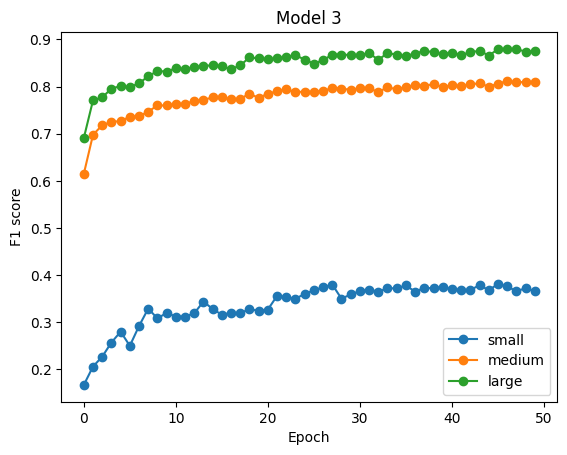

In [127]:
df_3 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/3/output.csv')


# Plotting a scatter plot
plt.plot(df_3['Epoch'], df_3['F1_score_s'], marker='o', label='small')
plt.plot(df_3['Epoch'], df_3['F1_score_m'], marker='o', label='medium')
plt.plot(df_3['Epoch'], df_3['F1_score_l'], marker='o', label='large')
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.legend()
plt.title('Model 3')
plt.show()

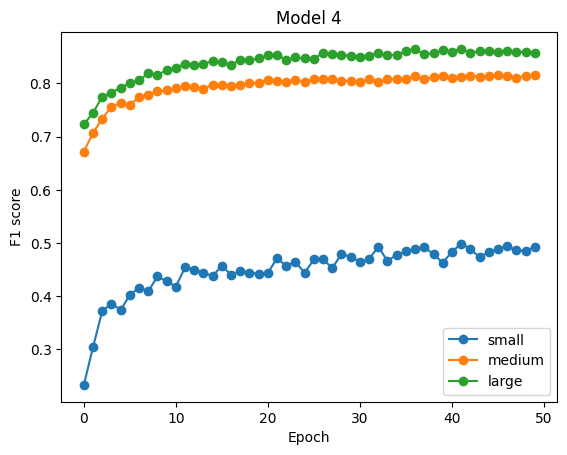

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


df_4 = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/4/output_complete.csv')


# Plotting a scatter plot
plt.plot(df_4['Epoch'], df_4['F1_score_s'], marker='o', label='small')
plt.plot(df_4['Epoch'], df_4['F1_score_m'], marker='o', label='medium')
plt.plot(df_4['Epoch'], df_4['F1_score_l'], marker='o', label='large')
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.legend()
plt.title('Model 4')
plt.show()

In [140]:
df_4['Total loss'] = [0.5535, 0.3354, 0.3005, 0.283, 0.2588, 0.2493, 0.2344, 0.2271, 0.2157, 0.2157, 0.2132, 0.2044, 0.2018, 0.1959, 0.1876, 0.1911, 0.1858, 0.1838, 0.1701, 0.1781, 0.1723, 0.1665, 0.1610, 0.1619, 0.1639, 0.1647, 0.1606, 0.1624, 0.1539, 0.1540, 0.1531, 0.1524, 0.1565, 0.1466, 0.1474, 0.1451, 0.1477, 0.1425, 0.1411, 0.1417, 0.1424, 0.1471, 0.1345, 0.1366, 0.1339, 0.1407, 0.1343, 0.1350, 0.1392, 0.1375]

df_4.to_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/4/output_complete.csv')

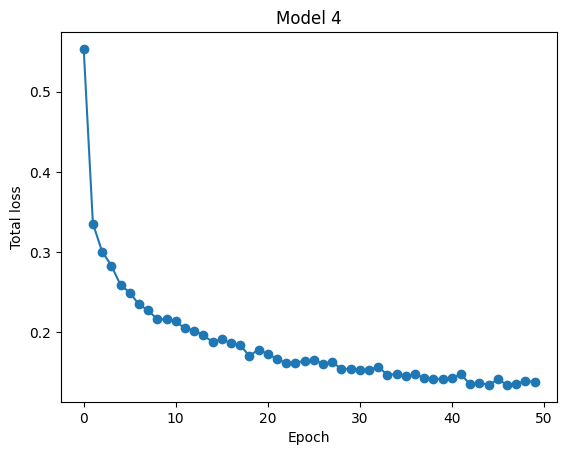

In [141]:
# Plotting a scatter plot
plt.plot(df_4['Epoch'], df_4['Total loss'], marker='o')
plt.xlabel('Epoch')
plt.ylabel('Total loss')
plt.title('Model 4')
plt.show()

In [11]:
df = pd.read_csv('/Users/anedicks/Desktop/THESIS_ADS/Attempt_2/20220404_Traffic_Sign_Detection_using_PyTorch_and_Pretrained_Faster_RCNN_Model/outputs/1/output.csv')

df

,Epoch,Total loss,loss_classifier,loss_box_reg,loss_objectness,loss_rpn_box_reg,mAR_s,mAR_m,mAR_l,mAR_all,mAP_s,mAP_m,mAP_l,mAP_all,F1_score_all,F1_score_s,F1_score_m,F1_score_l
0,0,0.5941,0.2415,0.3023,0.0379,0.0123,0.287,0.721,0.801,0.731,0.222,0.670,0.766,0.685,0.707,0.250,0.695,0.783
1,1,0.4862,0.1896,0.2620,0.0247,0.0099,0.254,0.747,0.830,0.756,0.205,0.712,0.794,0.720,0.738,0.227,0.729,0.812
2,2,0.4633,0.1803,0.2499,0.0241,0.0090,0.344,0.758,0.827,0.764,0.284,0.719,0.797,0.728,0.746,0.311,0.738,0.812
3,3,0.4343,0.1650,0.2409,0.0203,0.0081,0.318,0.778,0.852,0.786,0.263,0.745,0.822,0.752,0.769,0.288,0.761,0.837
4,4,0.4108,0.1561,0.2260,0.0209,0.0078,0.384,0.785,0.841,0.788,0.337,0.751,0.810,0.754,0.771,0.359,0.768,0.825
5,5,0.4037,0.1494,0.2287,0.0182,0.0074,0.358,0.777,0.849,0.784,0.288,0.746,0.822,0.753,0.768,0.319,0.761,0.835
6,6,0.4131,0.1540,0.2348,0.0172,0.0072,0.368,0.783,0.853,0.789,0.322,0.755,0.826,0.761,0.775,0.343,0.769,0.839
7,7,0.3901,0.1437,0.2235,0.0164,0.0065,0.408,0.807,0.875,0.813,0.363,0.775,0.845,0.781,0.797,0.384,0.791,0.860
8,8,0.3778,0.1392,0.2152,0.0170,0.0064,0.397,0.800,0.870,0.808,0.356,0.773,0.845,0.781,0.794,0.375,0.786,0.857
9,9,0.3591,0.1342,0.2041,0.0147,0.0061,0.360,0.819,0.870,0.816,0.303,0.790,0.845,0.786,0.801,0.329,0.804,0.857
